In [18]:
from vit_pytorch.recorder import Recorder
from vit_pytorch import ViT
import torch
from dataset import ImageDataset
from torch.utils.data import DataLoader
from scripts.model import *
from vit_pytorch.recorder import Recorder

In [19]:
img_dir = 'linsen_data'
annotations_file = 'linsen_data/annotations.csv'

BATCH_SIZE = 32
num_epochs = 8

ds_train = ImageDataset(annotations_file=annotations_file, img_dir=img_dir, set_type='train')
ds_test = ImageDataset(annotations_file=annotations_file, img_dir=img_dir, set_type='test')
  
dl_train = DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True)
dl_test = DataLoader(ds_test, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
image_size = 128
patch_size = 32
num_classes = 2
dim = 4
depth = 4
heads = 4
mlp_dim = 128
dropout = 0.01
emb_dropout = 0.01
 
model_config = {
  'image_size' : image_size,
  'patch_size' : patch_size,
  'num_classes' : num_classes,
  'dim' : dim,
  'depth' : depth,
  'heads' : heads,
  'mlp_dim' : mlp_dim,
  'dropout' : dropout,
  'emb_dropout' : emb_dropout
  }
 
model = ViT(image_size = image_size,
            patch_size = patch_size,
            num_classes = num_classes,
            dim = dim,
            depth = depth,
            heads = heads,
            mlp_dim = mlp_dim,
            dropout = dropout,
            emb_dropout = emb_dropout)

model.load_state_dict(torch.load('models/vit/model.pth', weights_only=True))
        
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

accuracy = test_step(model, dl_test, loss_fn, 'cpu')[1]

print(f'Accuracy: {accuracy:.4f}')

In [21]:
model.load_state_dict(torch.load('models/vit/model.pth', weights_only=True))
        
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

accuracy = test_step(model, dl_test, loss_fn, 'cpu')[1]

print(f'Accuracy: {accuracy:.4f}')

# optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
# loss_fn = torch.nn.CrossEntropyLoss()
 
# results = train(model=model,
#                 train_dataloader=dl_train,
#                 test_dataloader=dl_test,
#                 optimizer=optimizer,
#                 loss_fn=loss_fn,
#                 epochs=num_epochs,
#                 device='cpu')

39622
Accuracy: 0.8229


In [24]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
model = Recorder(model)
img_idx = 66
img = dl_test.dataset.__getitem__(img_idx)[0]
img = img.reshape(1, 3, image_size, image_size)
preds, attns = model(img)
last_layer = attns.sum(axis=0).sum(axis=0).sum(axis=0)
attn_heatmap = last_layer[0, 1:].reshape((int(image_size/patch_size), int(image_size/patch_size)))
attn_heatmap_resized = F.interpolate(attn_heatmap.unsqueeze(0).unsqueeze(0), [image_size, image_size], mode='bilinear')

batch, layers, heads, patch_x, patch_y = attns.shape

attn_image = attn_heatmap_resized[0][0].numpy()

img_np = img[0].permute(1, 2, 0).numpy()

img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min())

plt.figure(figsize=(10, 10))
plt.imshow(img_np)
plt.imshow(attn_image, cmap='jet', alpha=0.5)  
plt.axis('off')
plt.title("Attention Heatmap Overlay")
plt.show()

AttributeError: 'Recorder' object has no attribute 'transformer'

In [27]:
img_idx = 66
img = dl_test.dataset.__getitem__(img_idx)[0]
img = img.reshape(1, 3, image_size, image_size)
preds, attns = model(img)
dl_test.dataset.__getitem__(img_idx)[1]

ValueError: not enough values to unpack (expected 2, got 1)

In [9]:
last_layer = attns.sum(axis=0).sum(axis=0).sum(axis=0)
last_layer.shape

torch.Size([17, 17])

In [10]:
import torch.nn.functional as F
attn_heatmap = last_layer[0, 1:].reshape((int(image_size/patch_size), int(image_size/patch_size)))
print("attn_heatmap: ", attn_heatmap.shape)
attn_heatmap_resized = F.interpolate(attn_heatmap.unsqueeze(0).unsqueeze(0), [image_size, image_size], mode='bilinear')
print("attn_heatmap_resized: ", attn_heatmap_resized.shape)

attn_heatmap:  torch.Size([4, 4])
attn_heatmap_resized:  torch.Size([1, 1, 128, 128])


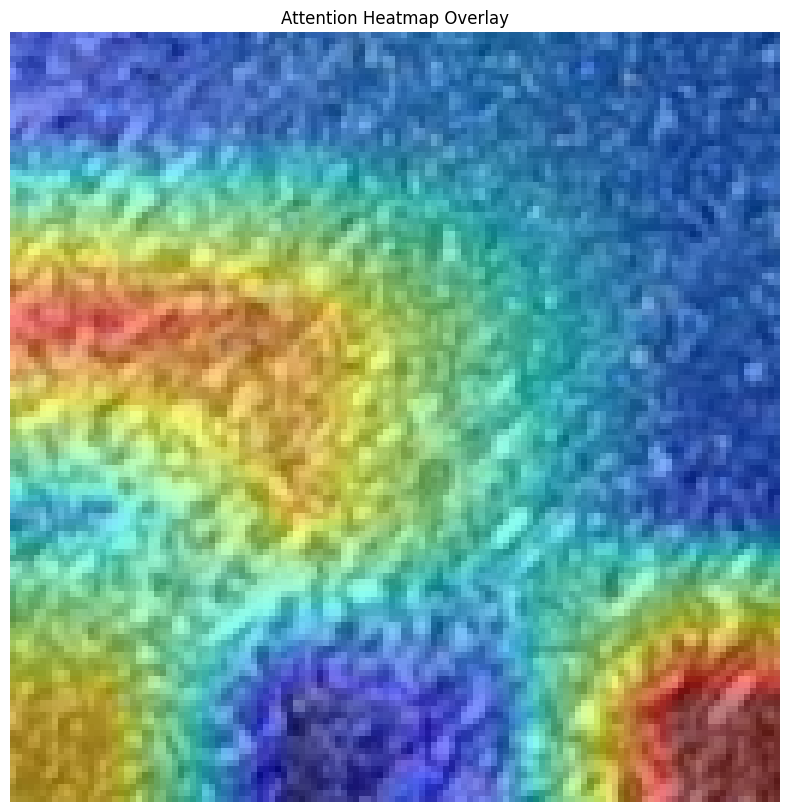

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T

batch, layers, heads, patch_x, patch_y = attns.shape

attn_image = attn_heatmap_resized[0][0].numpy()

img_np = img[0].permute(1, 2, 0).numpy()

img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min())

plt.figure(figsize=(10, 10))
plt.imshow(img_np)
plt.imshow(attn_image, cmap='jet', alpha=0.5)  
plt.axis('off')
plt.title("Attention Heatmap Overlay")
plt.show()